In [1]:
import sys, os
sys.path.insert(0, os.path.join(os.path.abspath('..'), 'src'))

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [12]:
%matplotlib inline
dpi = 600
mpl.rcParams['figure.dpi'] = dpi

In [20]:
def dx(f, dx, calc_bds=True):
    """
    Returns second order finite difference approximation of df/dx for
    a 2D field f.
    

    Parameters
    ----------
    f : ndarray
        An mxn array representing a smooth function f: R^2 -> R. 
    dx: float
        Specifies the x-direction spacing of adjacent gridpoints. 
    calc_bds : bool
        Specifies whether to calculate the derivative at the boundaries. If
        `True`, the method assumes `f` has value-0 normal derivatives at the
        x-boundary.

    Returns
    -------
    dxf : ndarray
        mxn array representing the first partial of f with respect to x. 
        Neumann boundary conditions used with normal derivatives at the
        boundaries set to zero. 
        
    Notes
    -----
    We use the "ghost point" method, because we assume the normal derivatives 
    are zero at the boundaries. This consists of defining new points outside 
    the domain and setting their values equal to the set of first interior
    points -- this is consistent with the second order central difference
    approximation for first derivatives.
    """
    
    dxf = np.zeros(f.shape)
    
    if calc_bds:
        dxf[1:-1, :] = ( f[2:, :] - f[:-2, :] ) / (2*dx)
    else:
        dxf[1:-1, 1:-1] = ( f[2:, 1:-1] - f[:-2, 1:-1] ) / (2*dx)
        
    return dxf

def dy(f, dy, calc_bds=True):
    """
    Returns second order finite difference approximation of df/dy for
    a 2D field f.
    

    Parameters
    ----------
    f : ndarray
        An mxn array representing a smooth function f: R^2 -> R. 
    dy: float
        Specifies the y-direction spacing of adjacent gridpoints. 
    calc_bds : bool
        Specifies whether to calculate the derivative at the boundaries. If
        `True`, the method assumes `f` has value-0 normal derivatives at the
        y-boundary.

    Returns
    -------
    dyf : ndarray
        mxn array representing the first partial of f with respect to y. 
        Neumann boundary conditions used with normal derivatives at the
        boundaries set to zero. 
        
    Notes
    -----
    We use the "ghost point" method, because we assume the normal derivatives 
    are zero at the boundaries. This consists of defining new points outside 
    the domain and setting their values equal to the set of first interior
    points -- this is consistent with the second order central difference
    approximation for first derivatives.
    """
    
    dyf = np.zeros(f.shape)
    
    if calc_bds:
        dyf[:, 1:-1] = ( f[:, 2:] - f[:, :-2] ) / (2*dy)
    else:
        dyf[1:-1, 1:-1] = ( f[1:-1, 2:] - f[1:-1, :-2] ) / (2*dy)
        
    return dyf


def curl(f, hx, hy=None, calc_bds=True):
    """
    Returns a second order finite difference approximation for the x- and
    y-components of the curl for a 2D field f.

    Parameters
    ----------
    f : ndarray
        An mxn array representing a smooth function f: R^2 -> R
    hx : double
        Specifies the x-direction spacing of adjacent grid-points.
    hy : double, optional
        Specifies the y-direction spacing of adjacent grid-points. If no value
        is entered, it is assumed that dy = dx. The default is None.
    calc_bds : bool, optional
        Specifies whether to calculate the curl at the boundaries. The default
        is True.

    Returns
    -------
    curl_fx : ndarray
        mxn array representing the x-component of the curl of f. If calc_bds
        is `False`, the value at the boundaries is 0.
    curl_fy : ndarray
        mxn array representing the y-component of the curl of f. If calc_bds
        is `False`, the value at the boundaries is 0.

    """
    
    curl_fy = -dx(f, hx, calc_bds)
    if hy:
        curl_fx = dy(f, hy, calc_bds)
    else:
        curl_fx = dy(f, hx, calc_bds)
        
    return curl_fx, curl_fy


In [14]:
shape = (10, 10)
L = [3, 3]
x = np.linspace(-L[0], L[0], num=shape[0])
y = np.linspace(-L[1], L[1], num=shape[1])
X, Y = np.meshgrid(x, y, indexing='ij')
hx = X[1, 0] - X[0, 0]
hy = Y[0, 1] - Y[0, 0]

Text(0, 0.5, 'y')

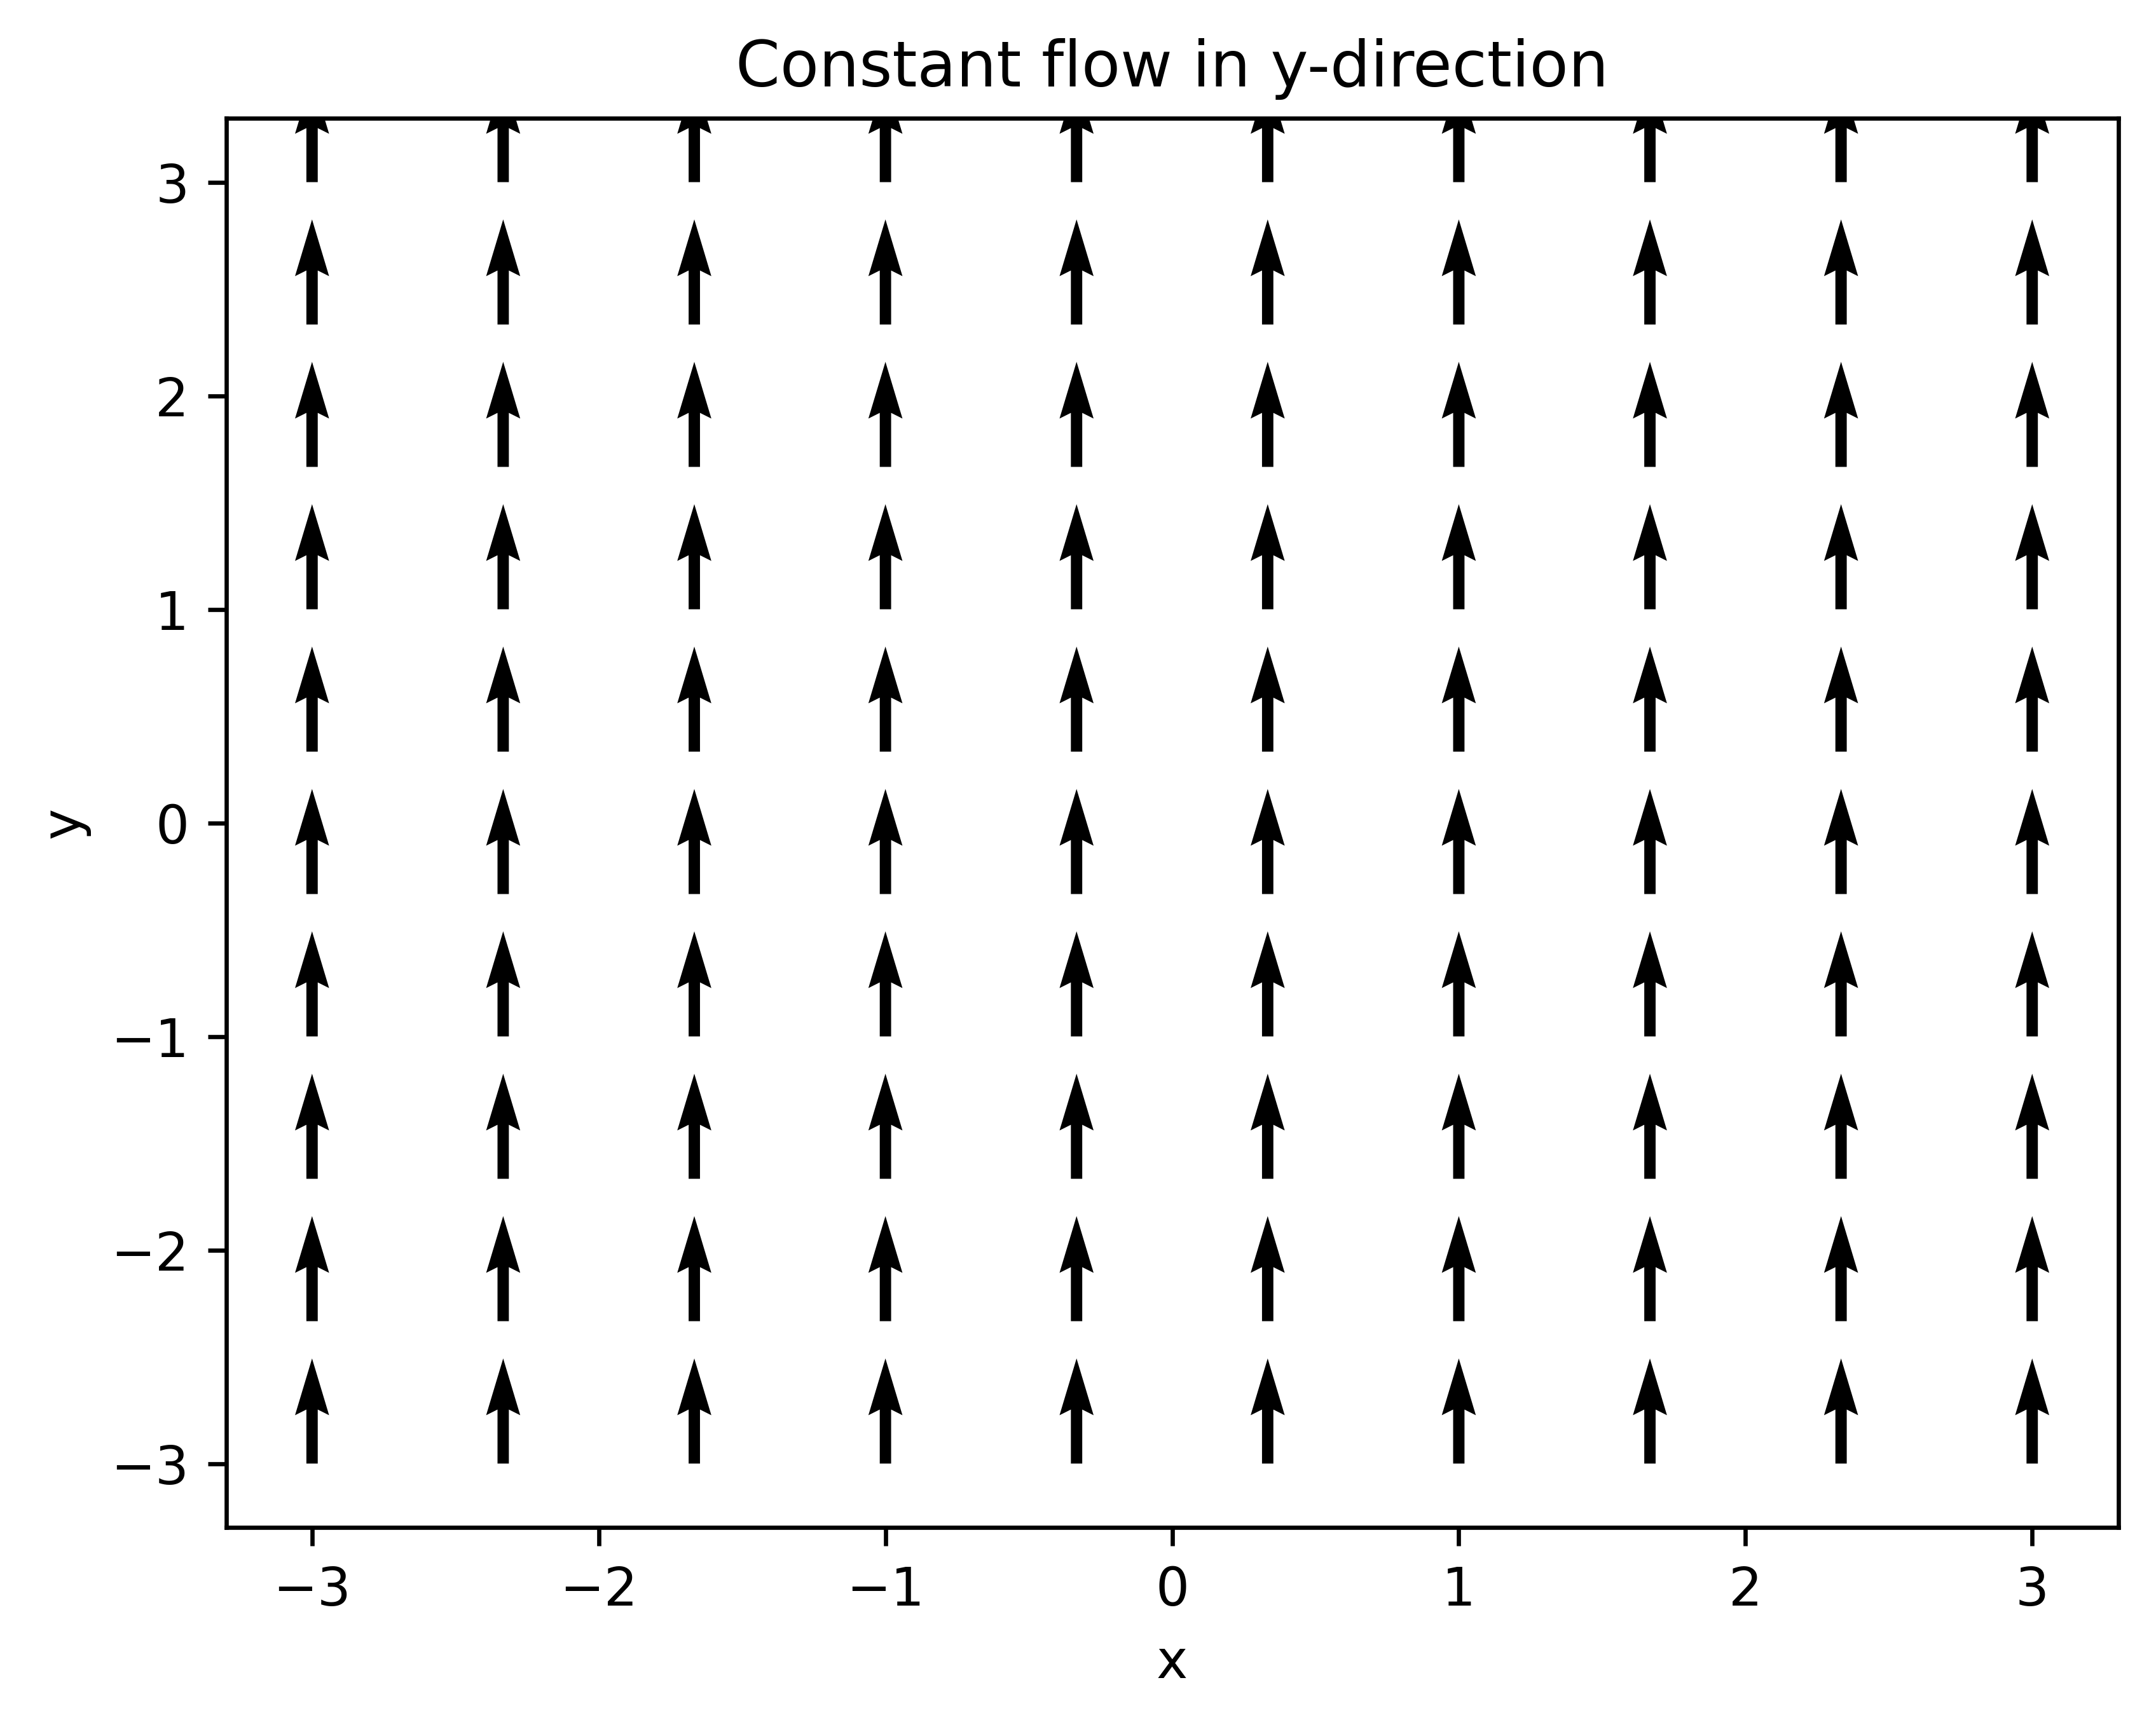

In [15]:
vx = np.zeros(shape)
vy = np.ones(shape)

fig, ax = plt.subplots()
ax.quiver(X, Y, vx, vy)
ax.set_title("Constant flow in y-direction")
ax.set_xlabel("x")
ax.set_ylabel("y")

Text(0, 0.5, 'y')

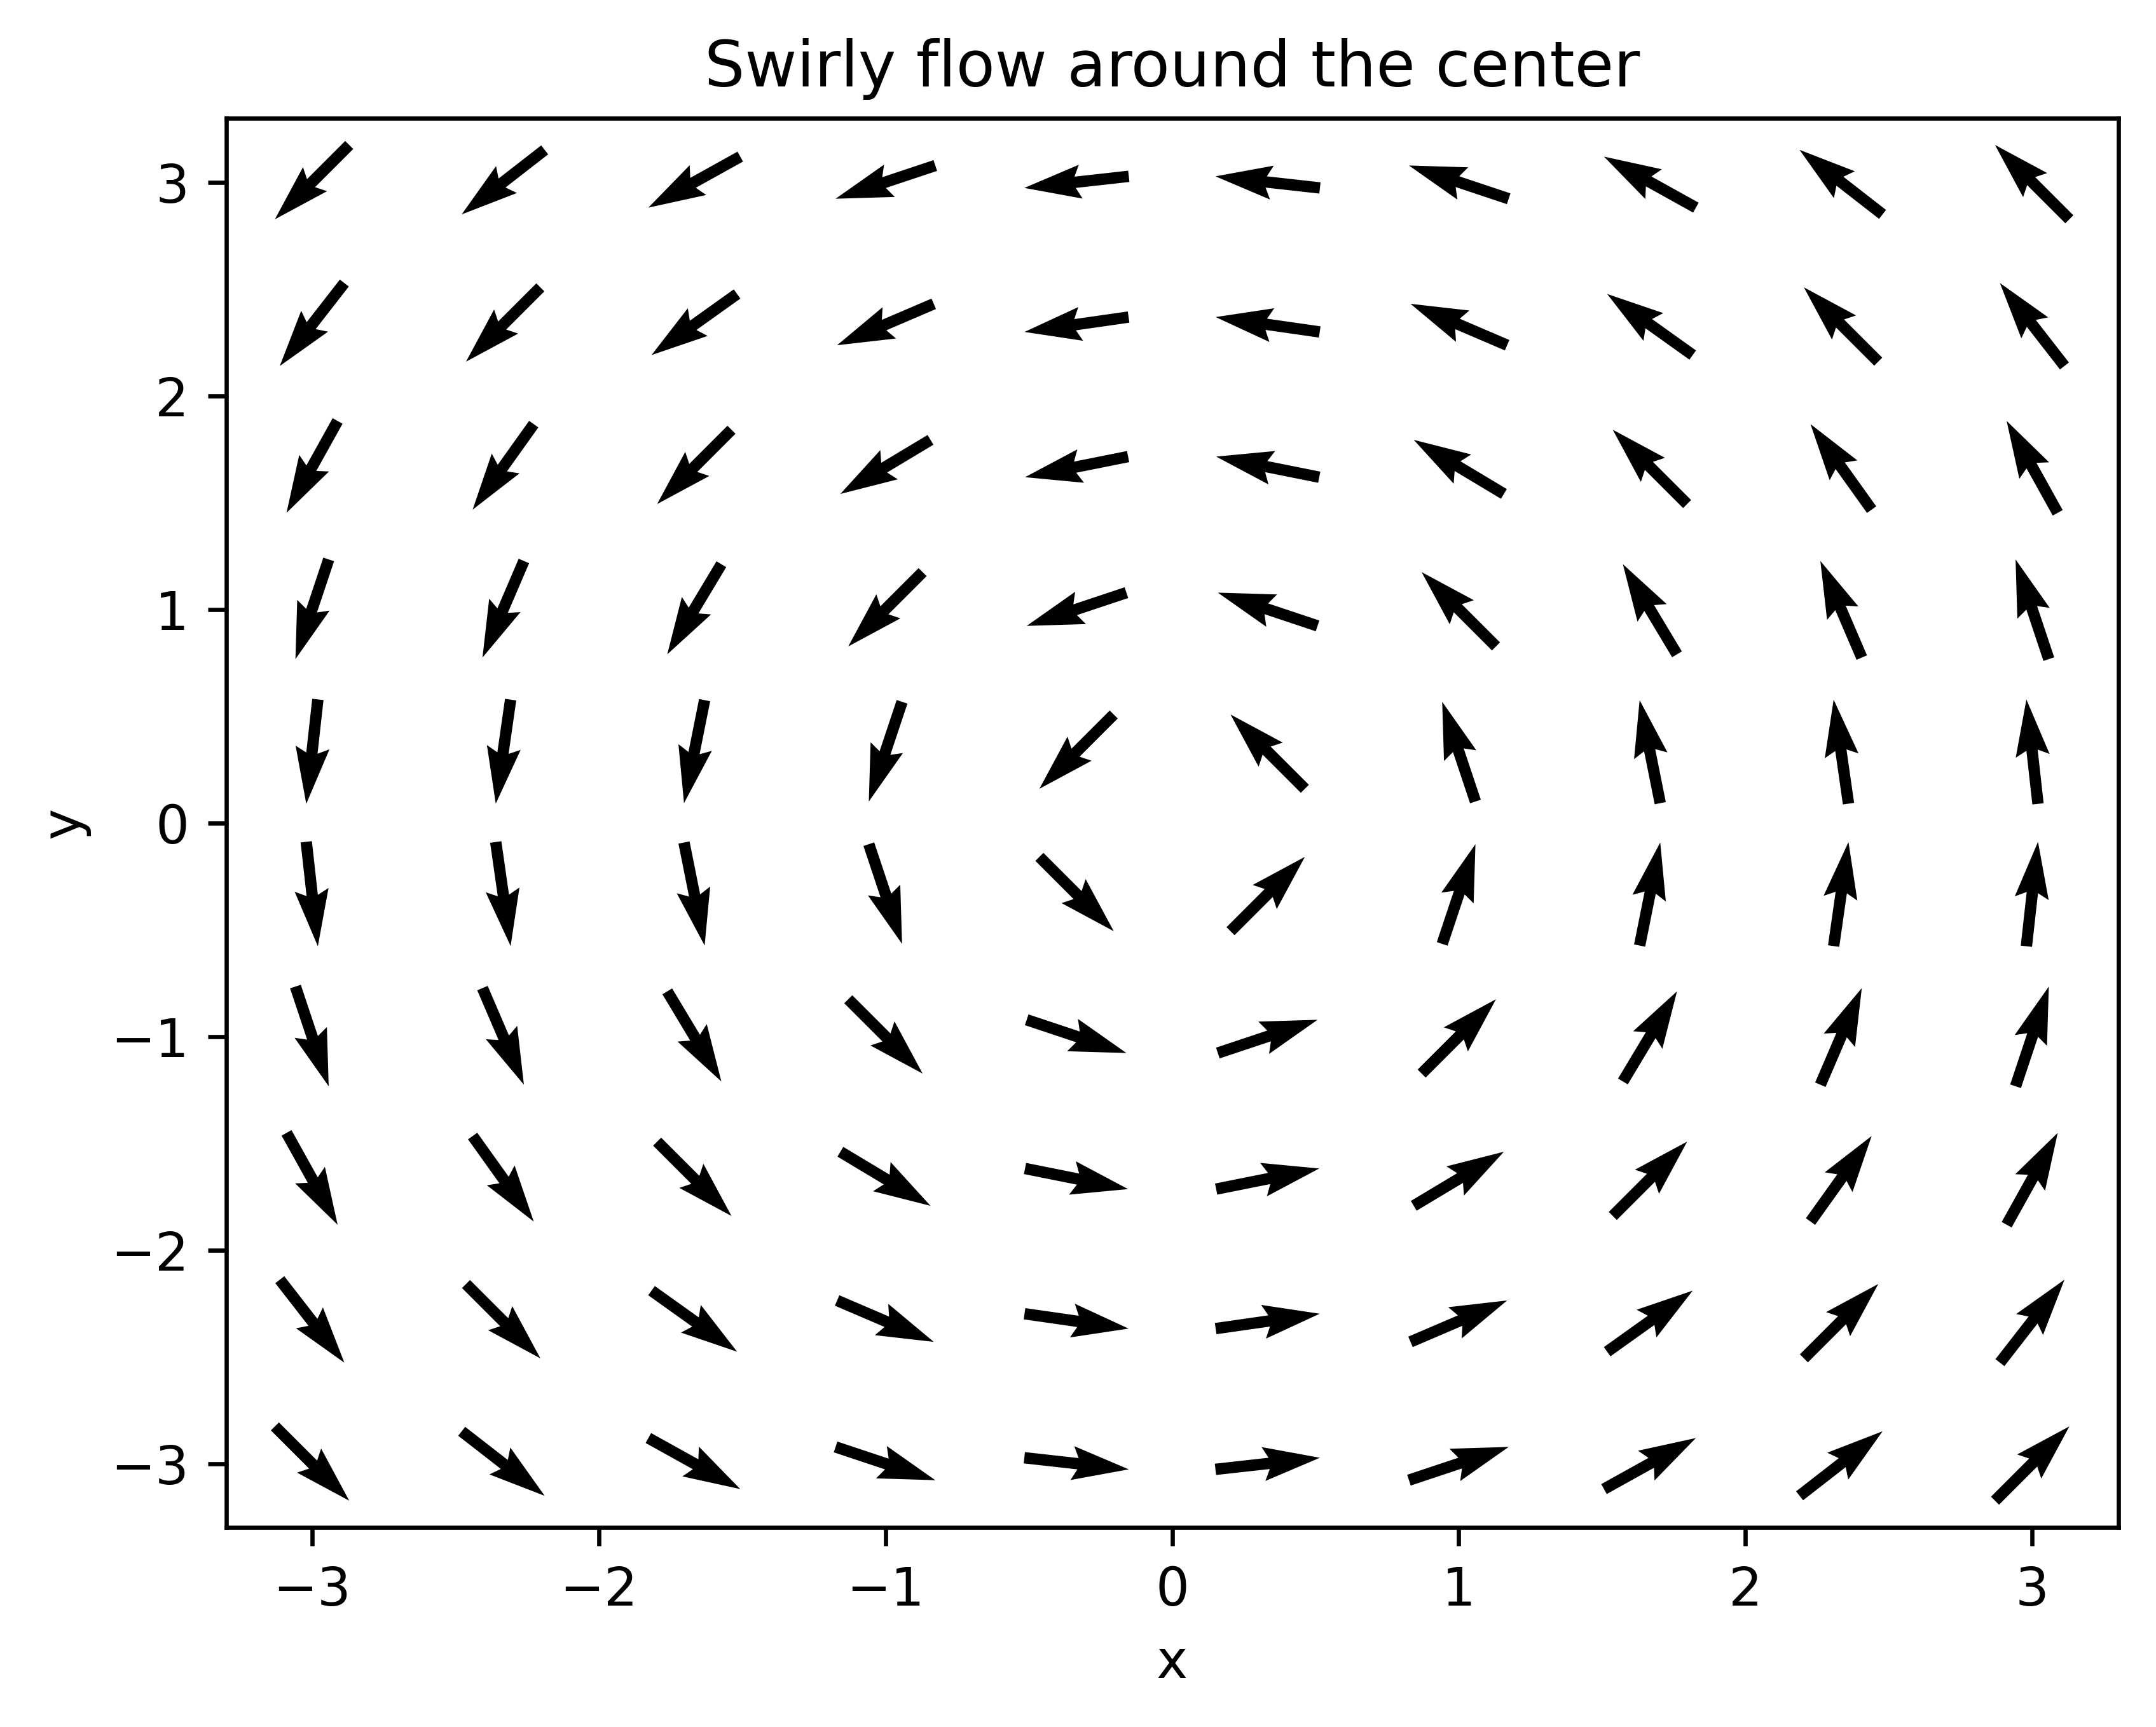

In [16]:
vx = -Y/np.sqrt(X**2 + Y**2)
vy = X/np.sqrt(X**2 + Y**2)

fig, ax = plt.subplots()
ax.quiver(X, Y, vx, vy, pivot='middle')
ax.set_title("Swirly flow around the center")
ax.set_xlabel("x")
ax.set_ylabel("y")

Text(0, 0.5, 'y')

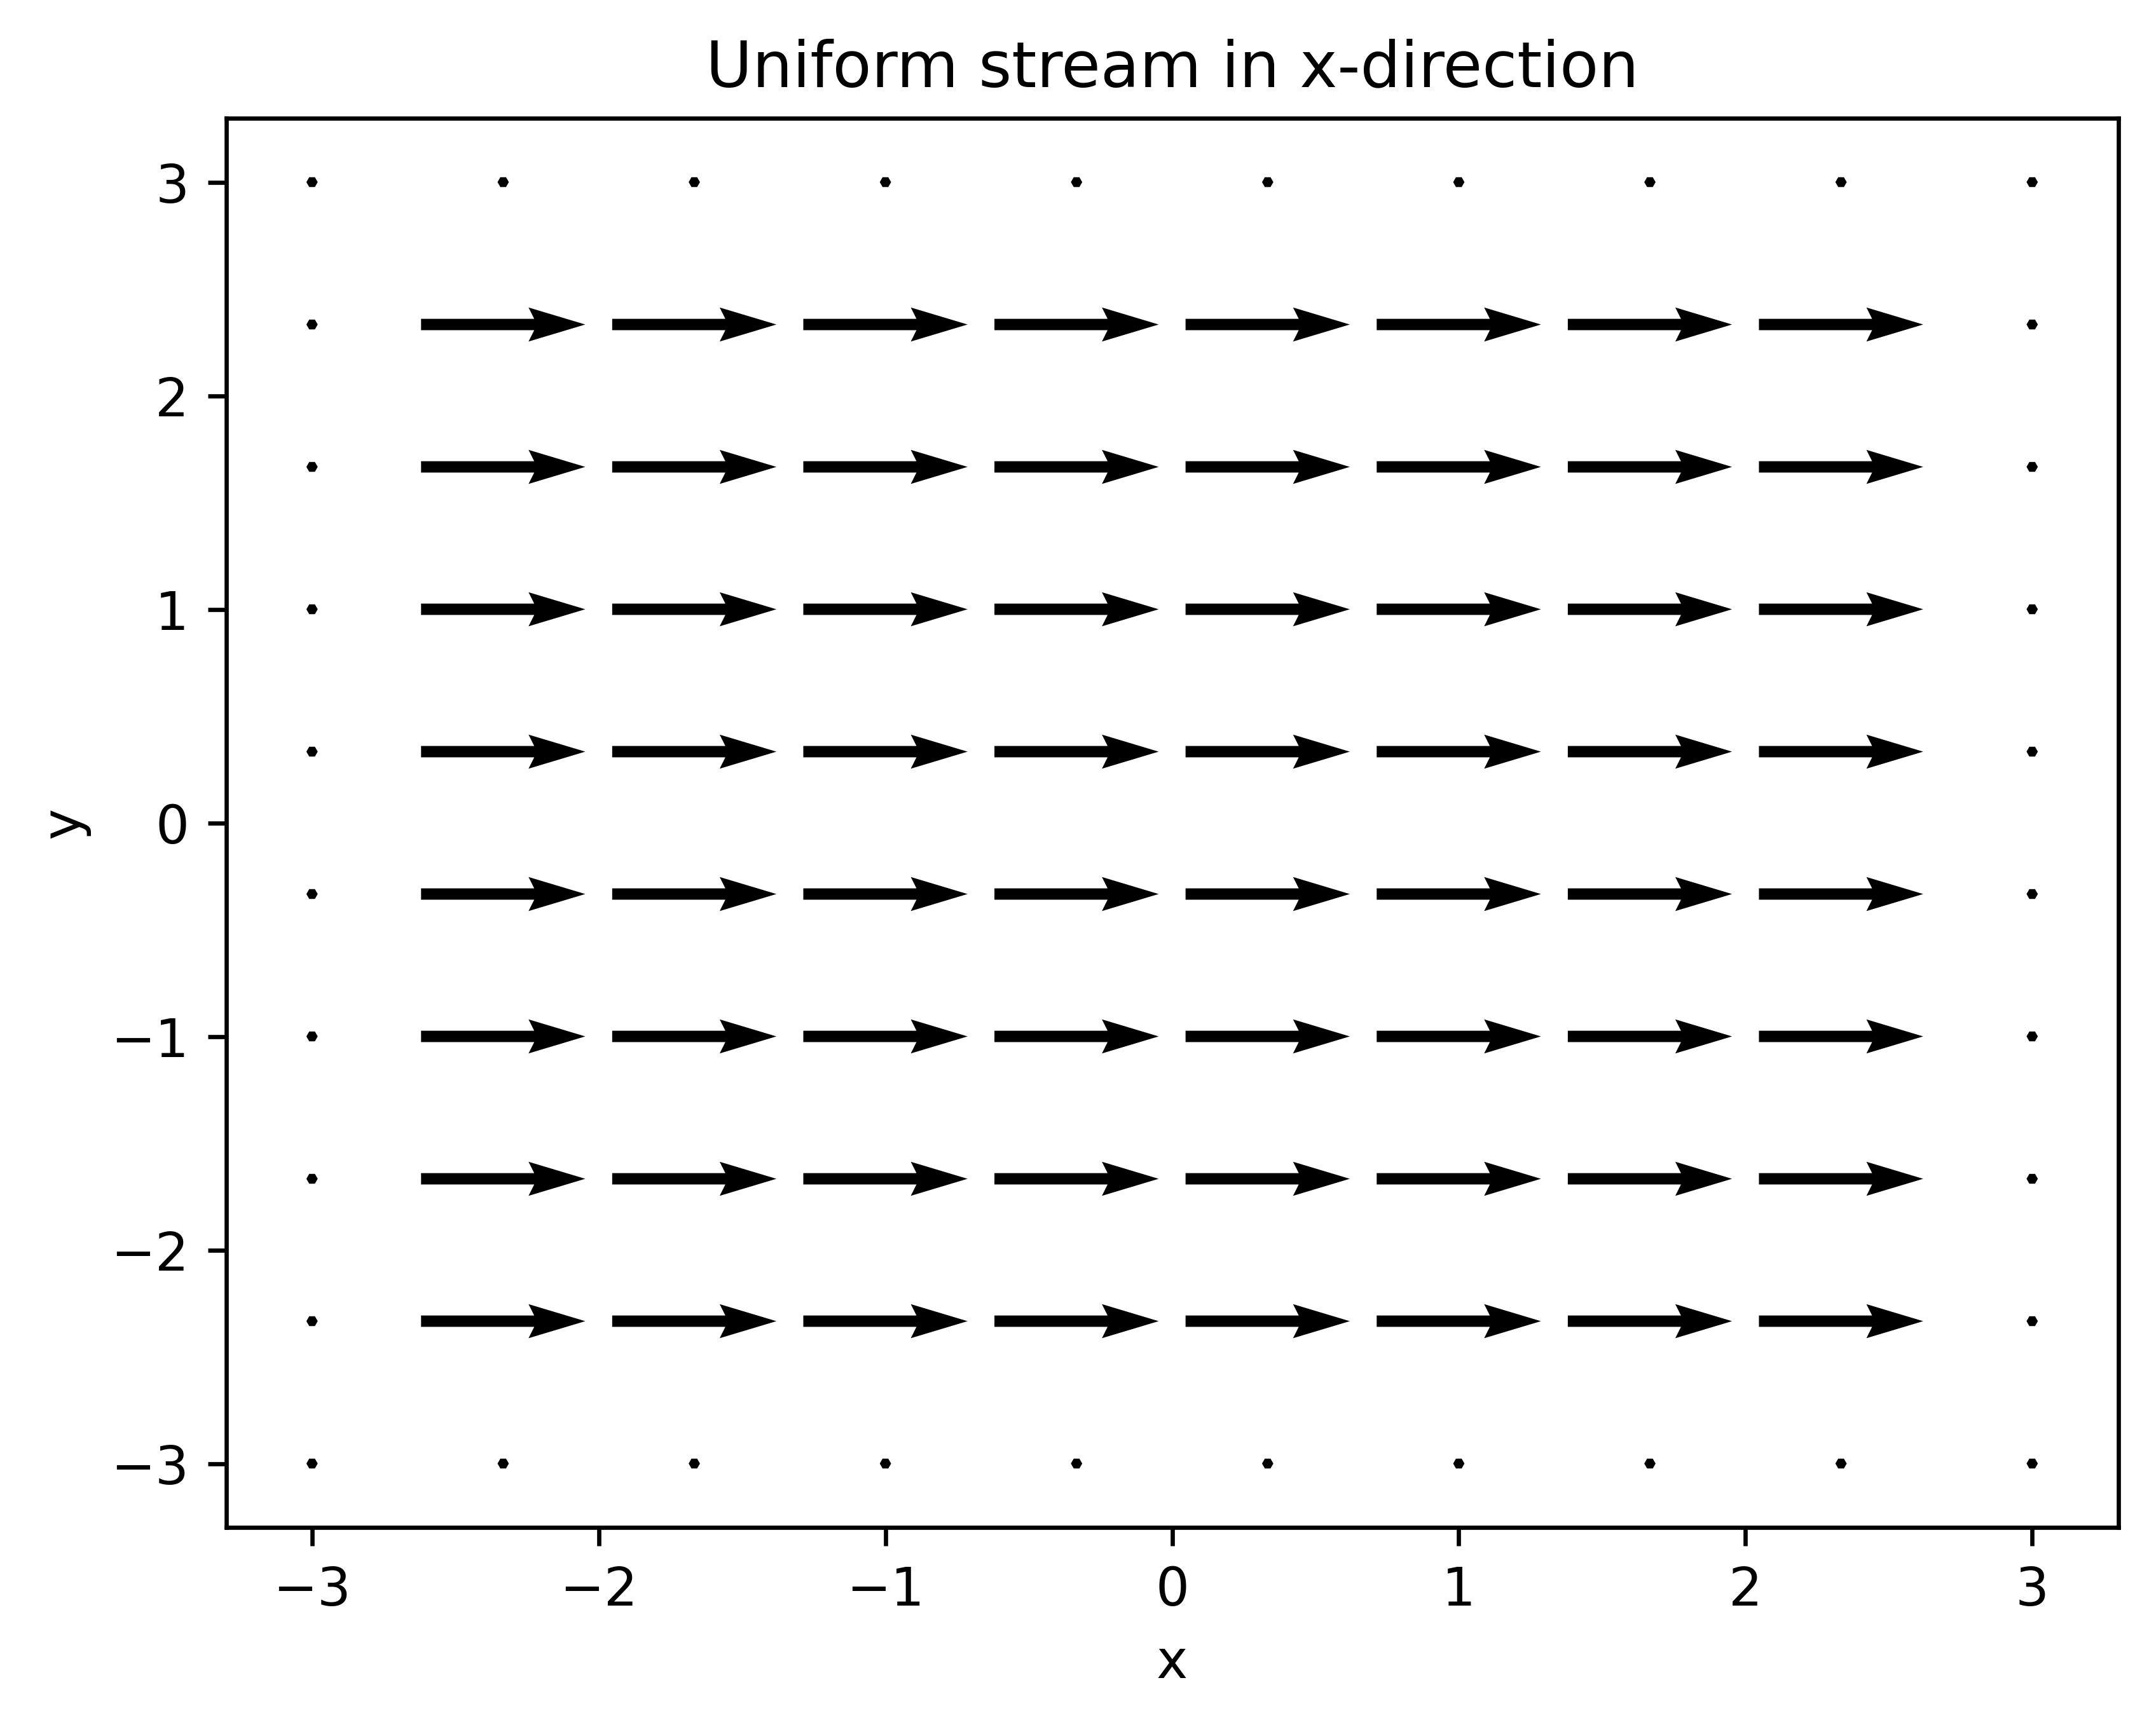

In [21]:
psi = Y
vx, vy = curl(psi, hx, hy, calc_bds=False)

fig, ax = plt.subplots()
ax.quiver(X, Y, vx, vy, pivot='middle')
ax.set_title("Uniform stream in x-direction")
ax.set_xlabel("x")
ax.set_ylabel("y")

Text(0, 0.5, 'y')

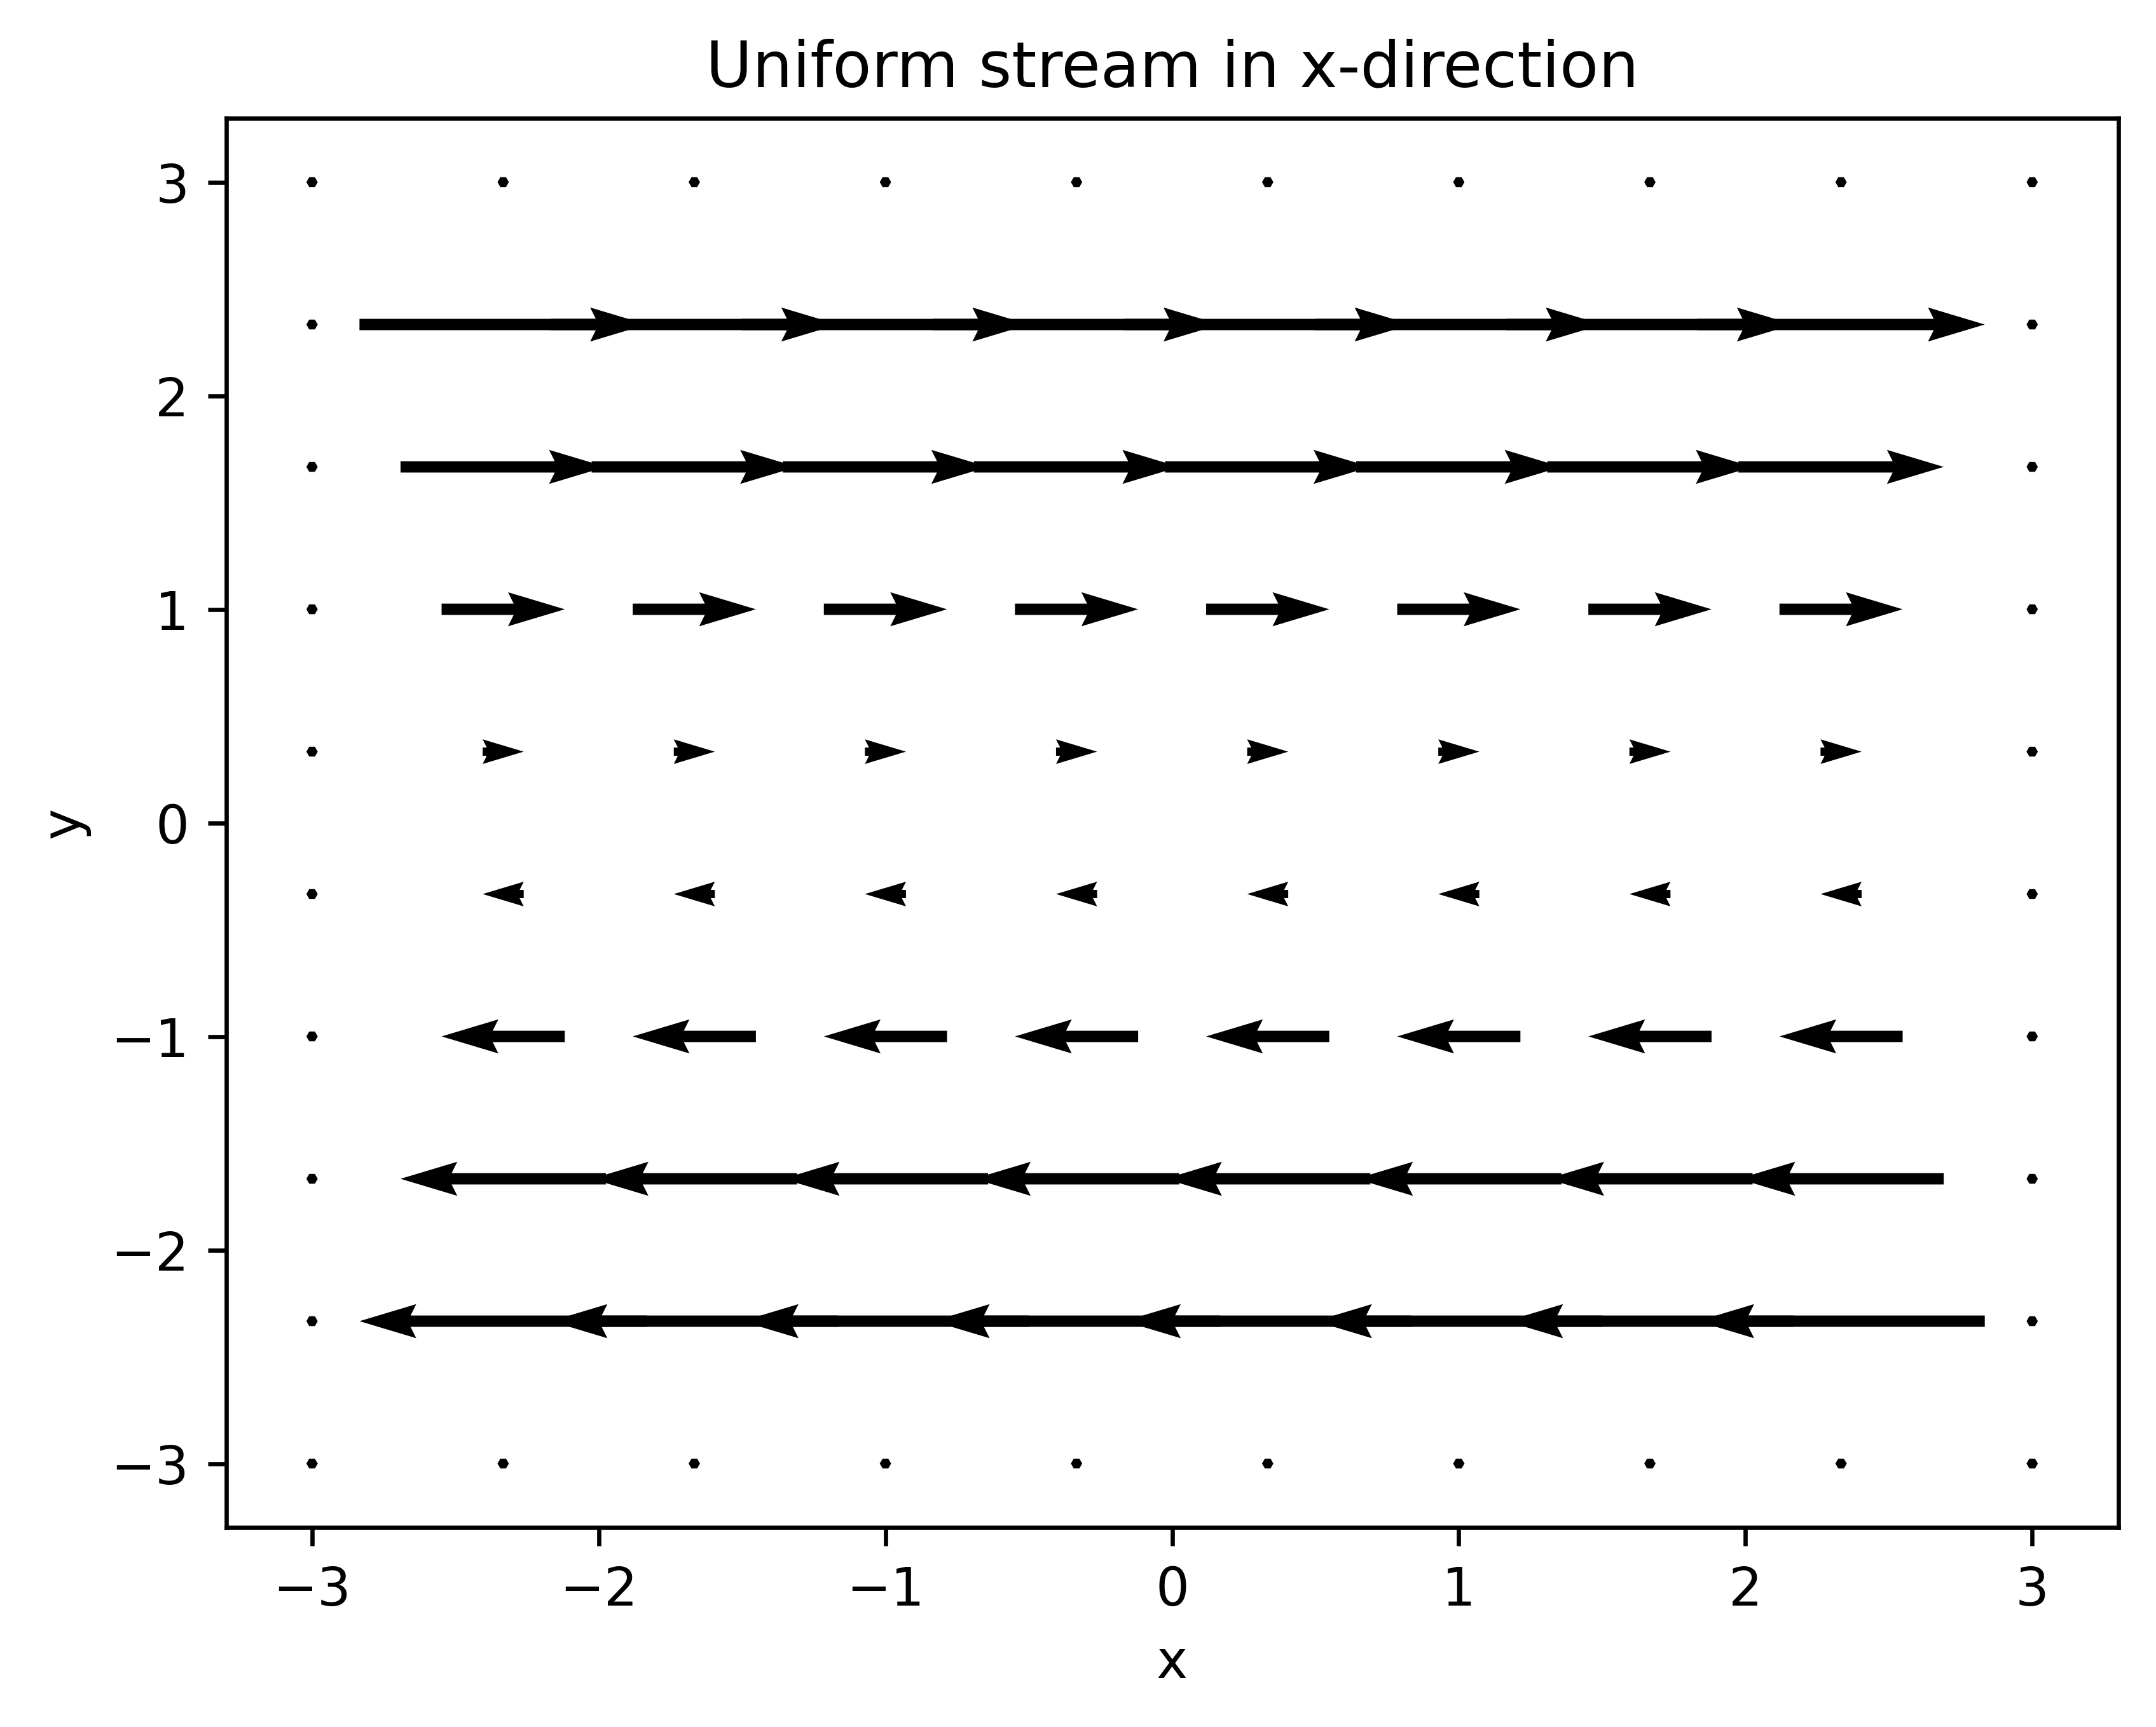

In [22]:
psi = Y**2/2
vx, vy = curl(psi, hx, hy, calc_bds=False)

fig, ax = plt.subplots()
ax.quiver(X, Y, vx, vy, pivot='middle')
ax.set_title("Uniform stream in x-direction")
ax.set_xlabel("x")
ax.set_ylabel("y")


Text(0, 0.5, 'y')

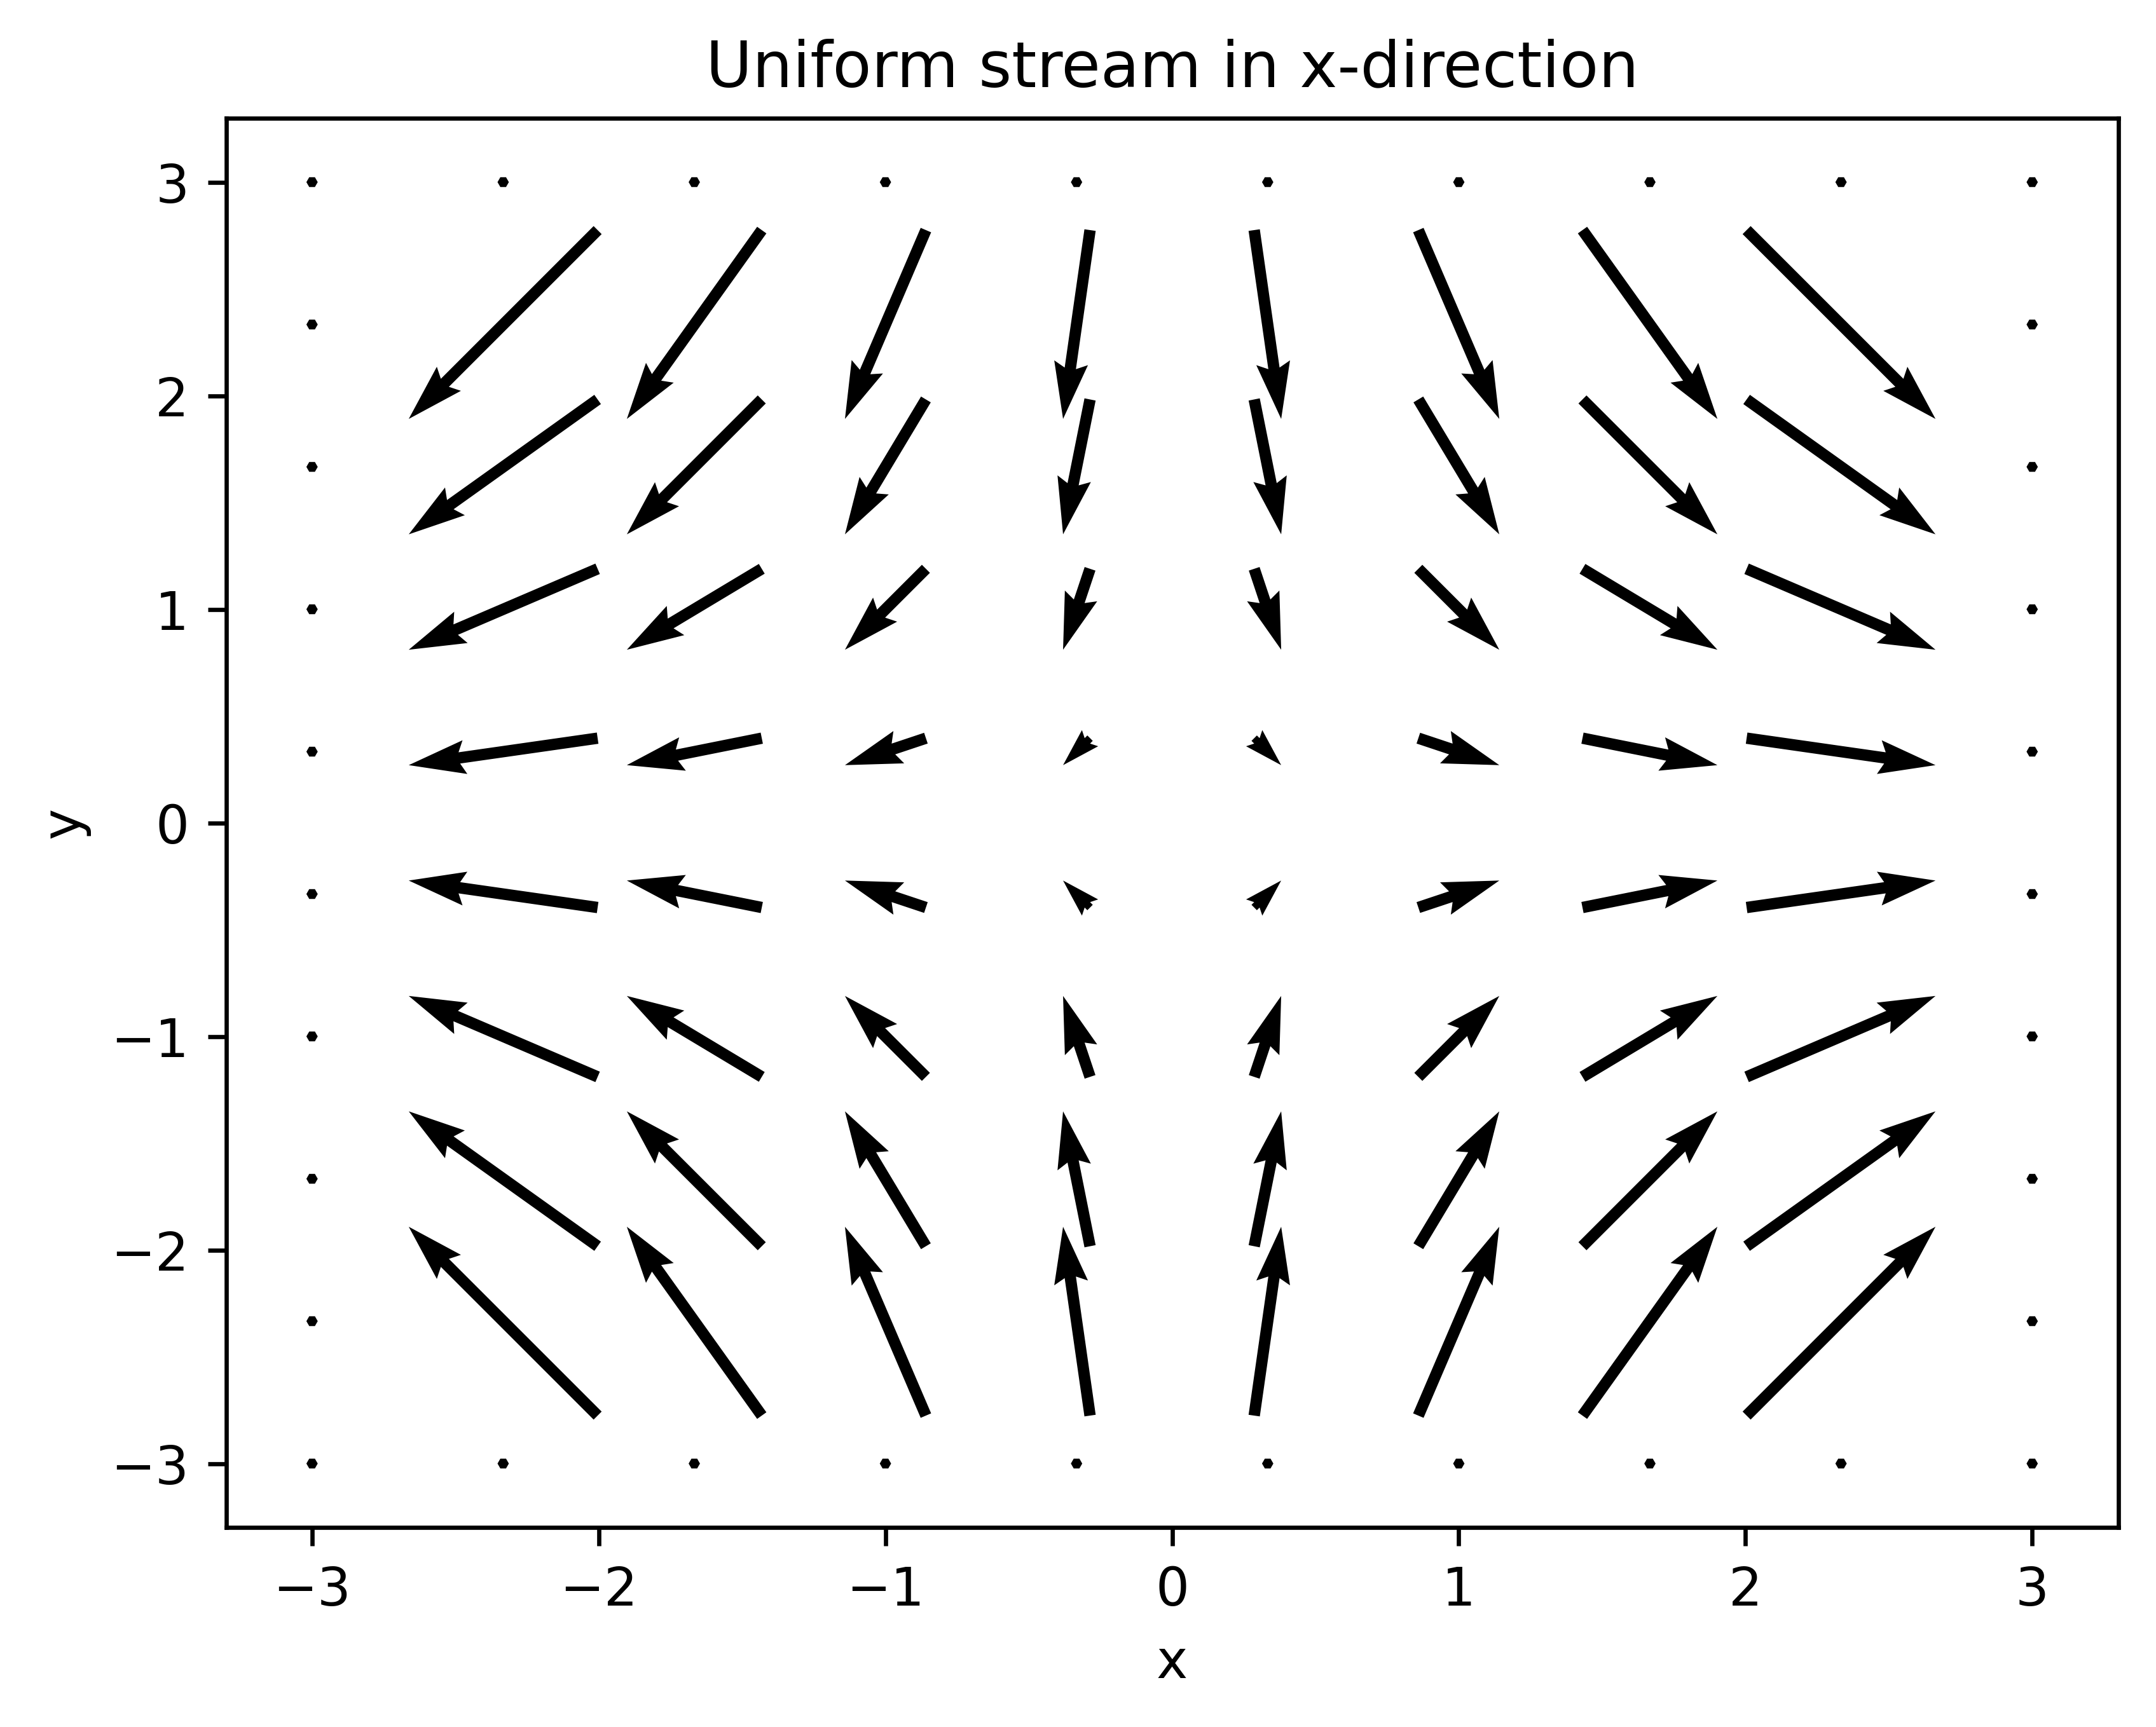

In [23]:
psi = X*Y
vx, vy = curl(psi, hx, hy, calc_bds=False)

fig, ax = plt.subplots()
ax.quiver(X, Y, vx, vy, pivot='middle')
ax.set_title("Uniform stream in x-direction")
ax.set_xlabel("x")
ax.set_ylabel("y")

Text(0, 0.5, 'y')

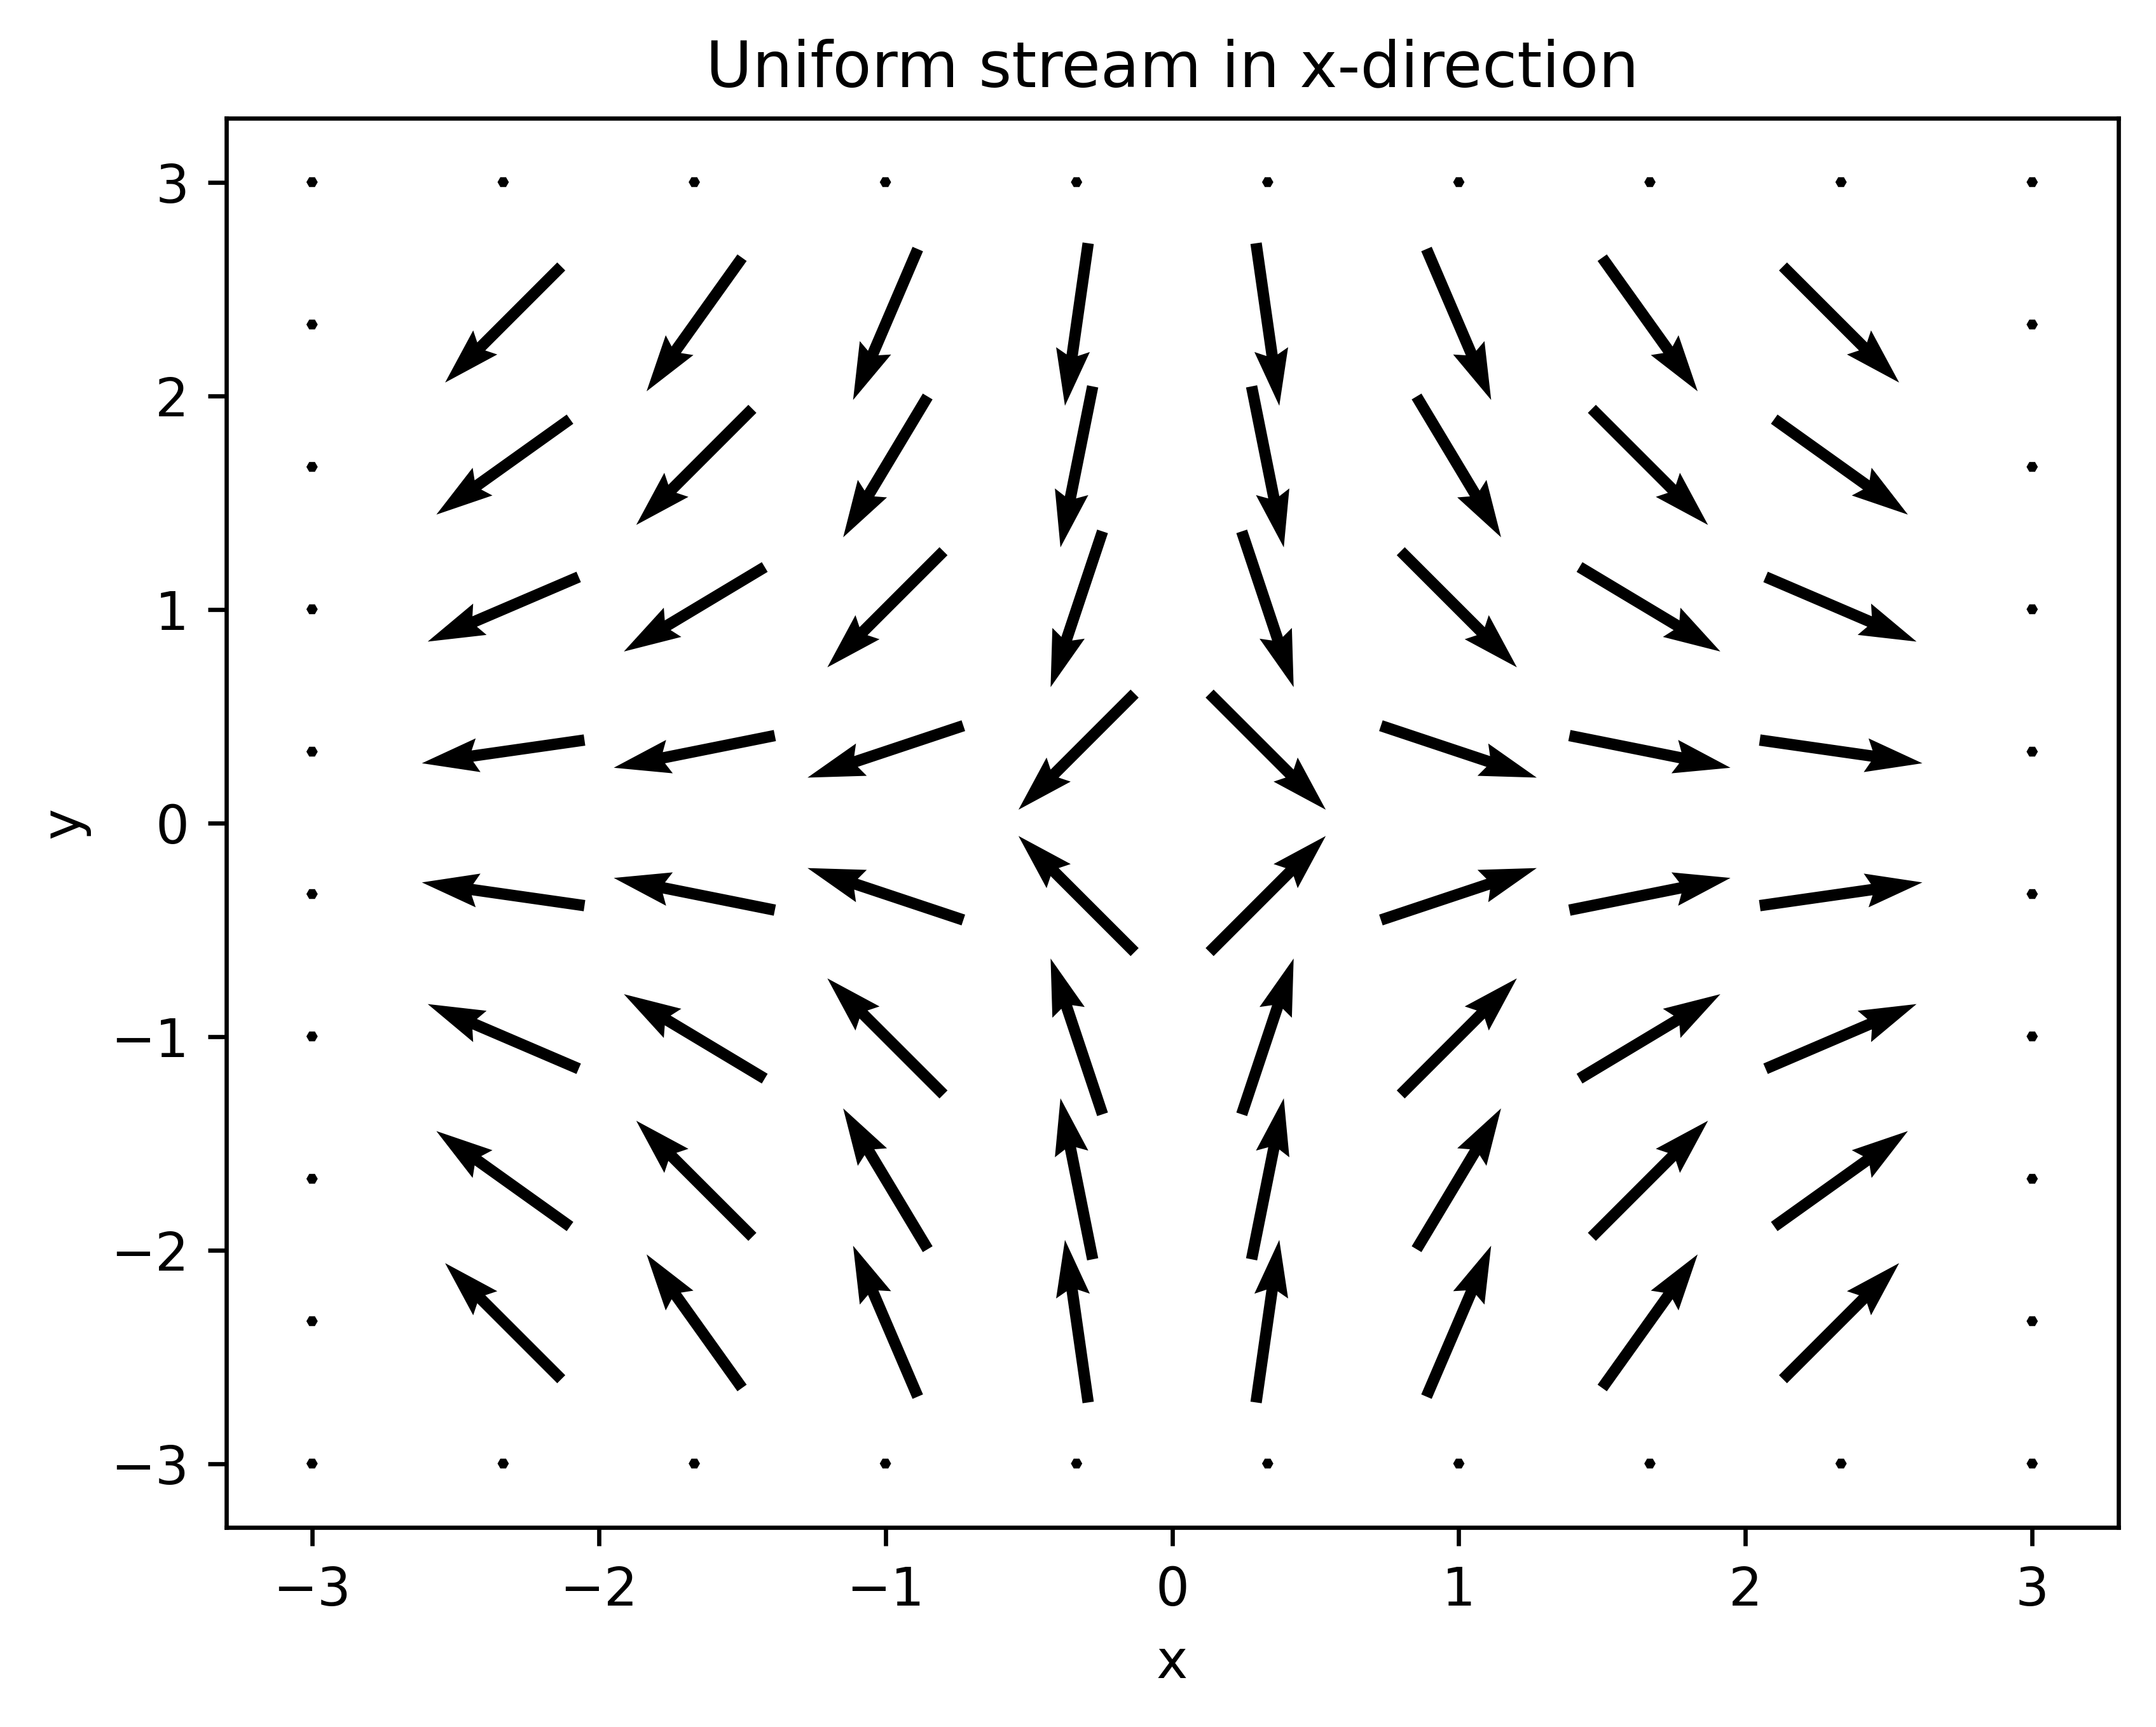

In [24]:
psi = X*Y
vx, vy = curl(psi, hx, hy, calc_bds=False)

x_mask = np.where(vx != 0)
y_mask = np.where(vy != 0)
vx_norm = np.zeros(vx.shape)
vy_norm = np.zeros(vy.shape)
vx_norm[x_mask] = vx[x_mask] / np.sqrt(vx[x_mask]**2 + vy[x_mask]**2)
vy_norm[y_mask] = vy[y_mask] / np.sqrt(vx[y_mask]**2 + vy[y_mask]**2)


fig, ax = plt.subplots()
ax.quiver(X, Y, vx_norm, vy_norm, pivot='middle')
ax.set_title("Uniform stream in x-direction")
ax.set_xlabel("x")
ax.set_ylabel("y")

Text(0, 0.5, 'y')

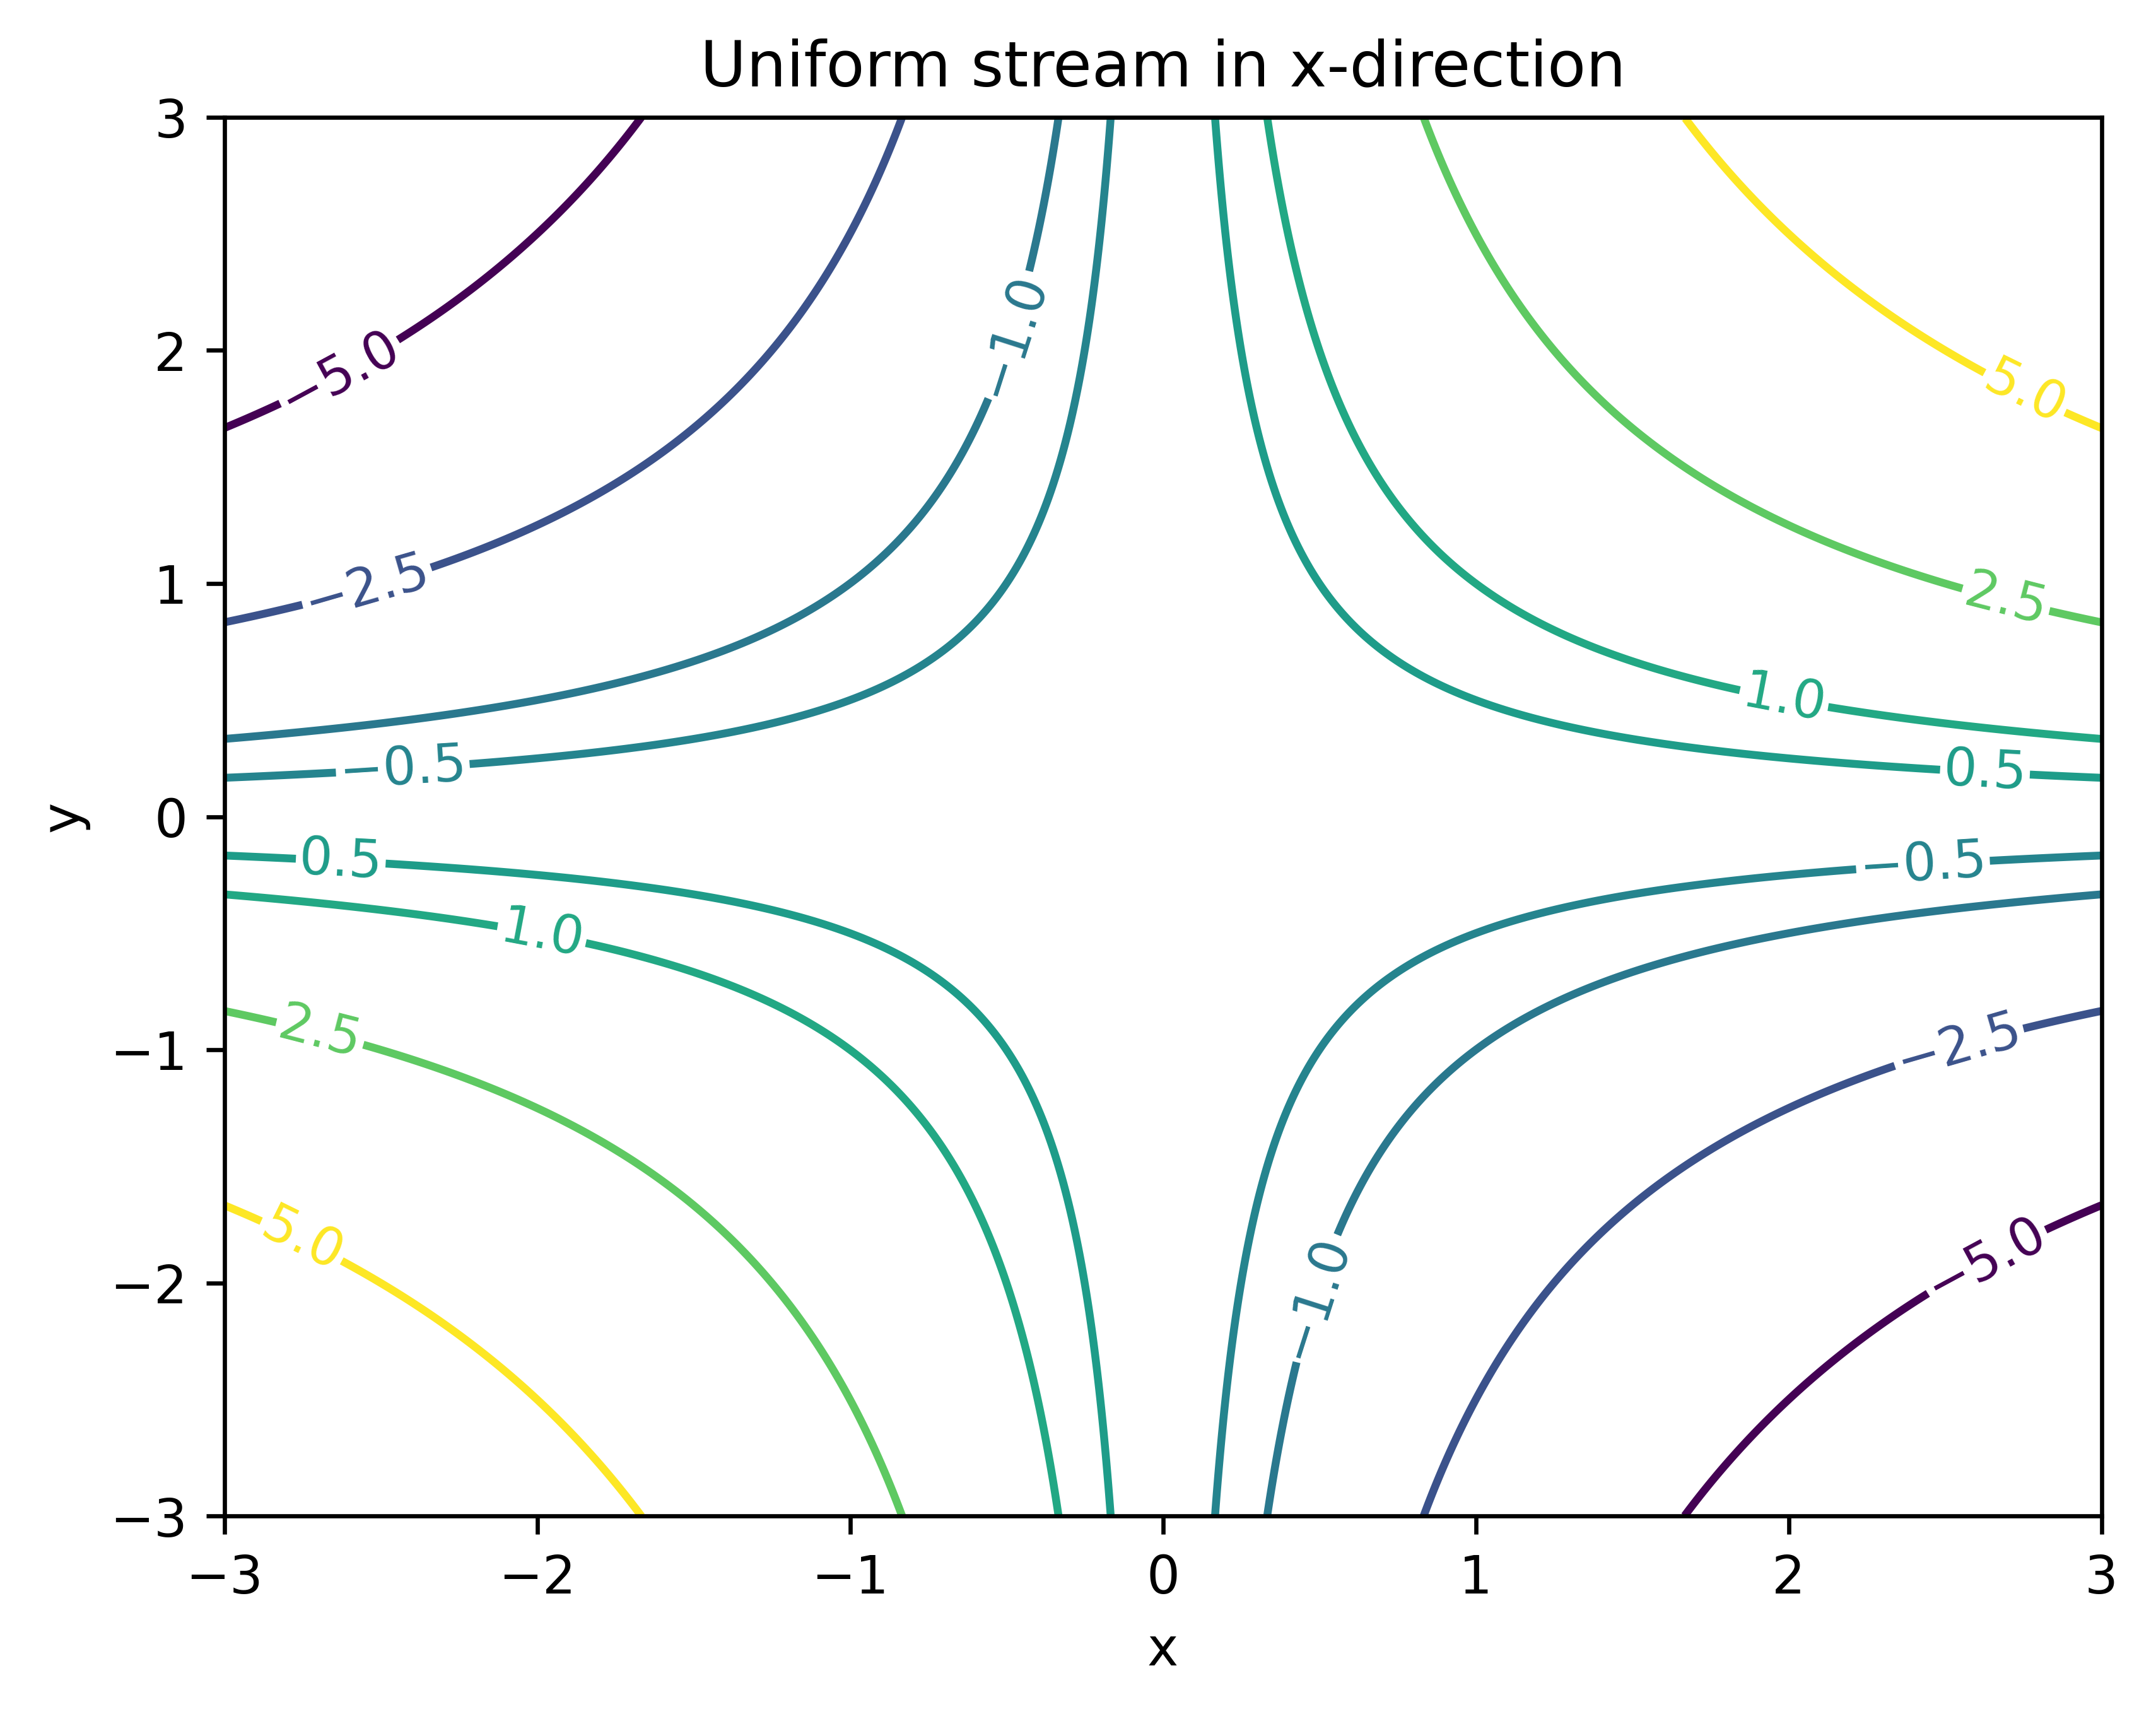

In [25]:
n = 1000
L = 3
x = np.linspace(-L, L, num=n)
y = np.linspace(-L, L, num=n)
X, Y = np.meshgrid(x, y, indexing='ij')

psi = X*Y
levels = [-5, -2.5, -1, -0.5, 0.5, 1, 2.5, 5]

fig, ax = plt.subplots()
cp = ax.contour(X, Y, psi, levels)
ax.clabel(cp)
ax.set_title("Uniform stream in x-direction")
ax.set_xlabel("x")
ax.set_ylabel("y")


In [30]:
import numpy as np
import matplotlib.pyplot as plt

N = 100
size = (N+2)*(N+2)
u = np.zeros(size)
u_prev = np.zeros(size)
v = np.zeros(size)
v_prev = np.zeros(size)
dens = np.zeros(size)
dens_prev = np.zeros(size)





In [35]:
import numpy as np

# Parameters
L = 1.0       # Size of the square grid
N = 64        # Number of grid cells
dx = L / N    # Grid spacing
dt = 0.01     # Time step
viscosity = 0.01

# Create grids for velocity components (u, v) and pressure (p)
u = np.zeros((N, N))
v = np.zeros((N, N))
p = np.zeros((N, N))

x0, y0 = N // 2, N // 2  # Center of the vortex
radius = 10  # Vortex radius
u[x0 - radius:x0 + radius, y0 - radius:y0 + radius] = 1.0

# Simulation loop
num_steps = 100
for step in range(num_steps):
    # Compute velocity divergence
    div = np.zeros((N, N))
    for i in range(1, N - 1):
        for j in range(1, N - 1):
            div[i, j] = (u[i+1, j] - u[i-1, j] + v[i, j+1] - v[i, j-1]) / (2 * dx)
    
    # Pressure Poisson Equation (PPE) to enforce incompressibility
    for _ in range(20):  # Iterative solver for PPE
        p_new = np.copy(p)
        for i in range(1, N - 1):
            for j in range(1, N - 1):
                p_new[i, j] = ((p[i+1, j] + p[i-1, j] + p[i, j+1] + p[i, j-1]) +
                               dx**2 * div[i, j]) / 4.0
        p = p_new
    
    # Update velocity components
    for i in range(1, N - 1):
        for j in range(1, N - 1):
            u[i, j] -= dt / (2 * dx) * (p[i+1, j] - p[i-1, j])
            v[i, j] -= dt / (2 * dx) * (p[i, j+1] - p[i, j-1])
    
    # Boundary conditions (e.g., no-slip walls)
    u[:, 0] = 0.0
    u[:, -1] = 0.0
    u[0, :] = 0.0
    u[-1, :] = 1.0  # Constant velocity inlet on the right
    v[:, 0] = 0.0
    v[:, -1] = 0.0
    v[0, :] = 0.0
    v[-1, :] = 0.0

# Your simulation is complete. You can visualize the results or save them as needed.


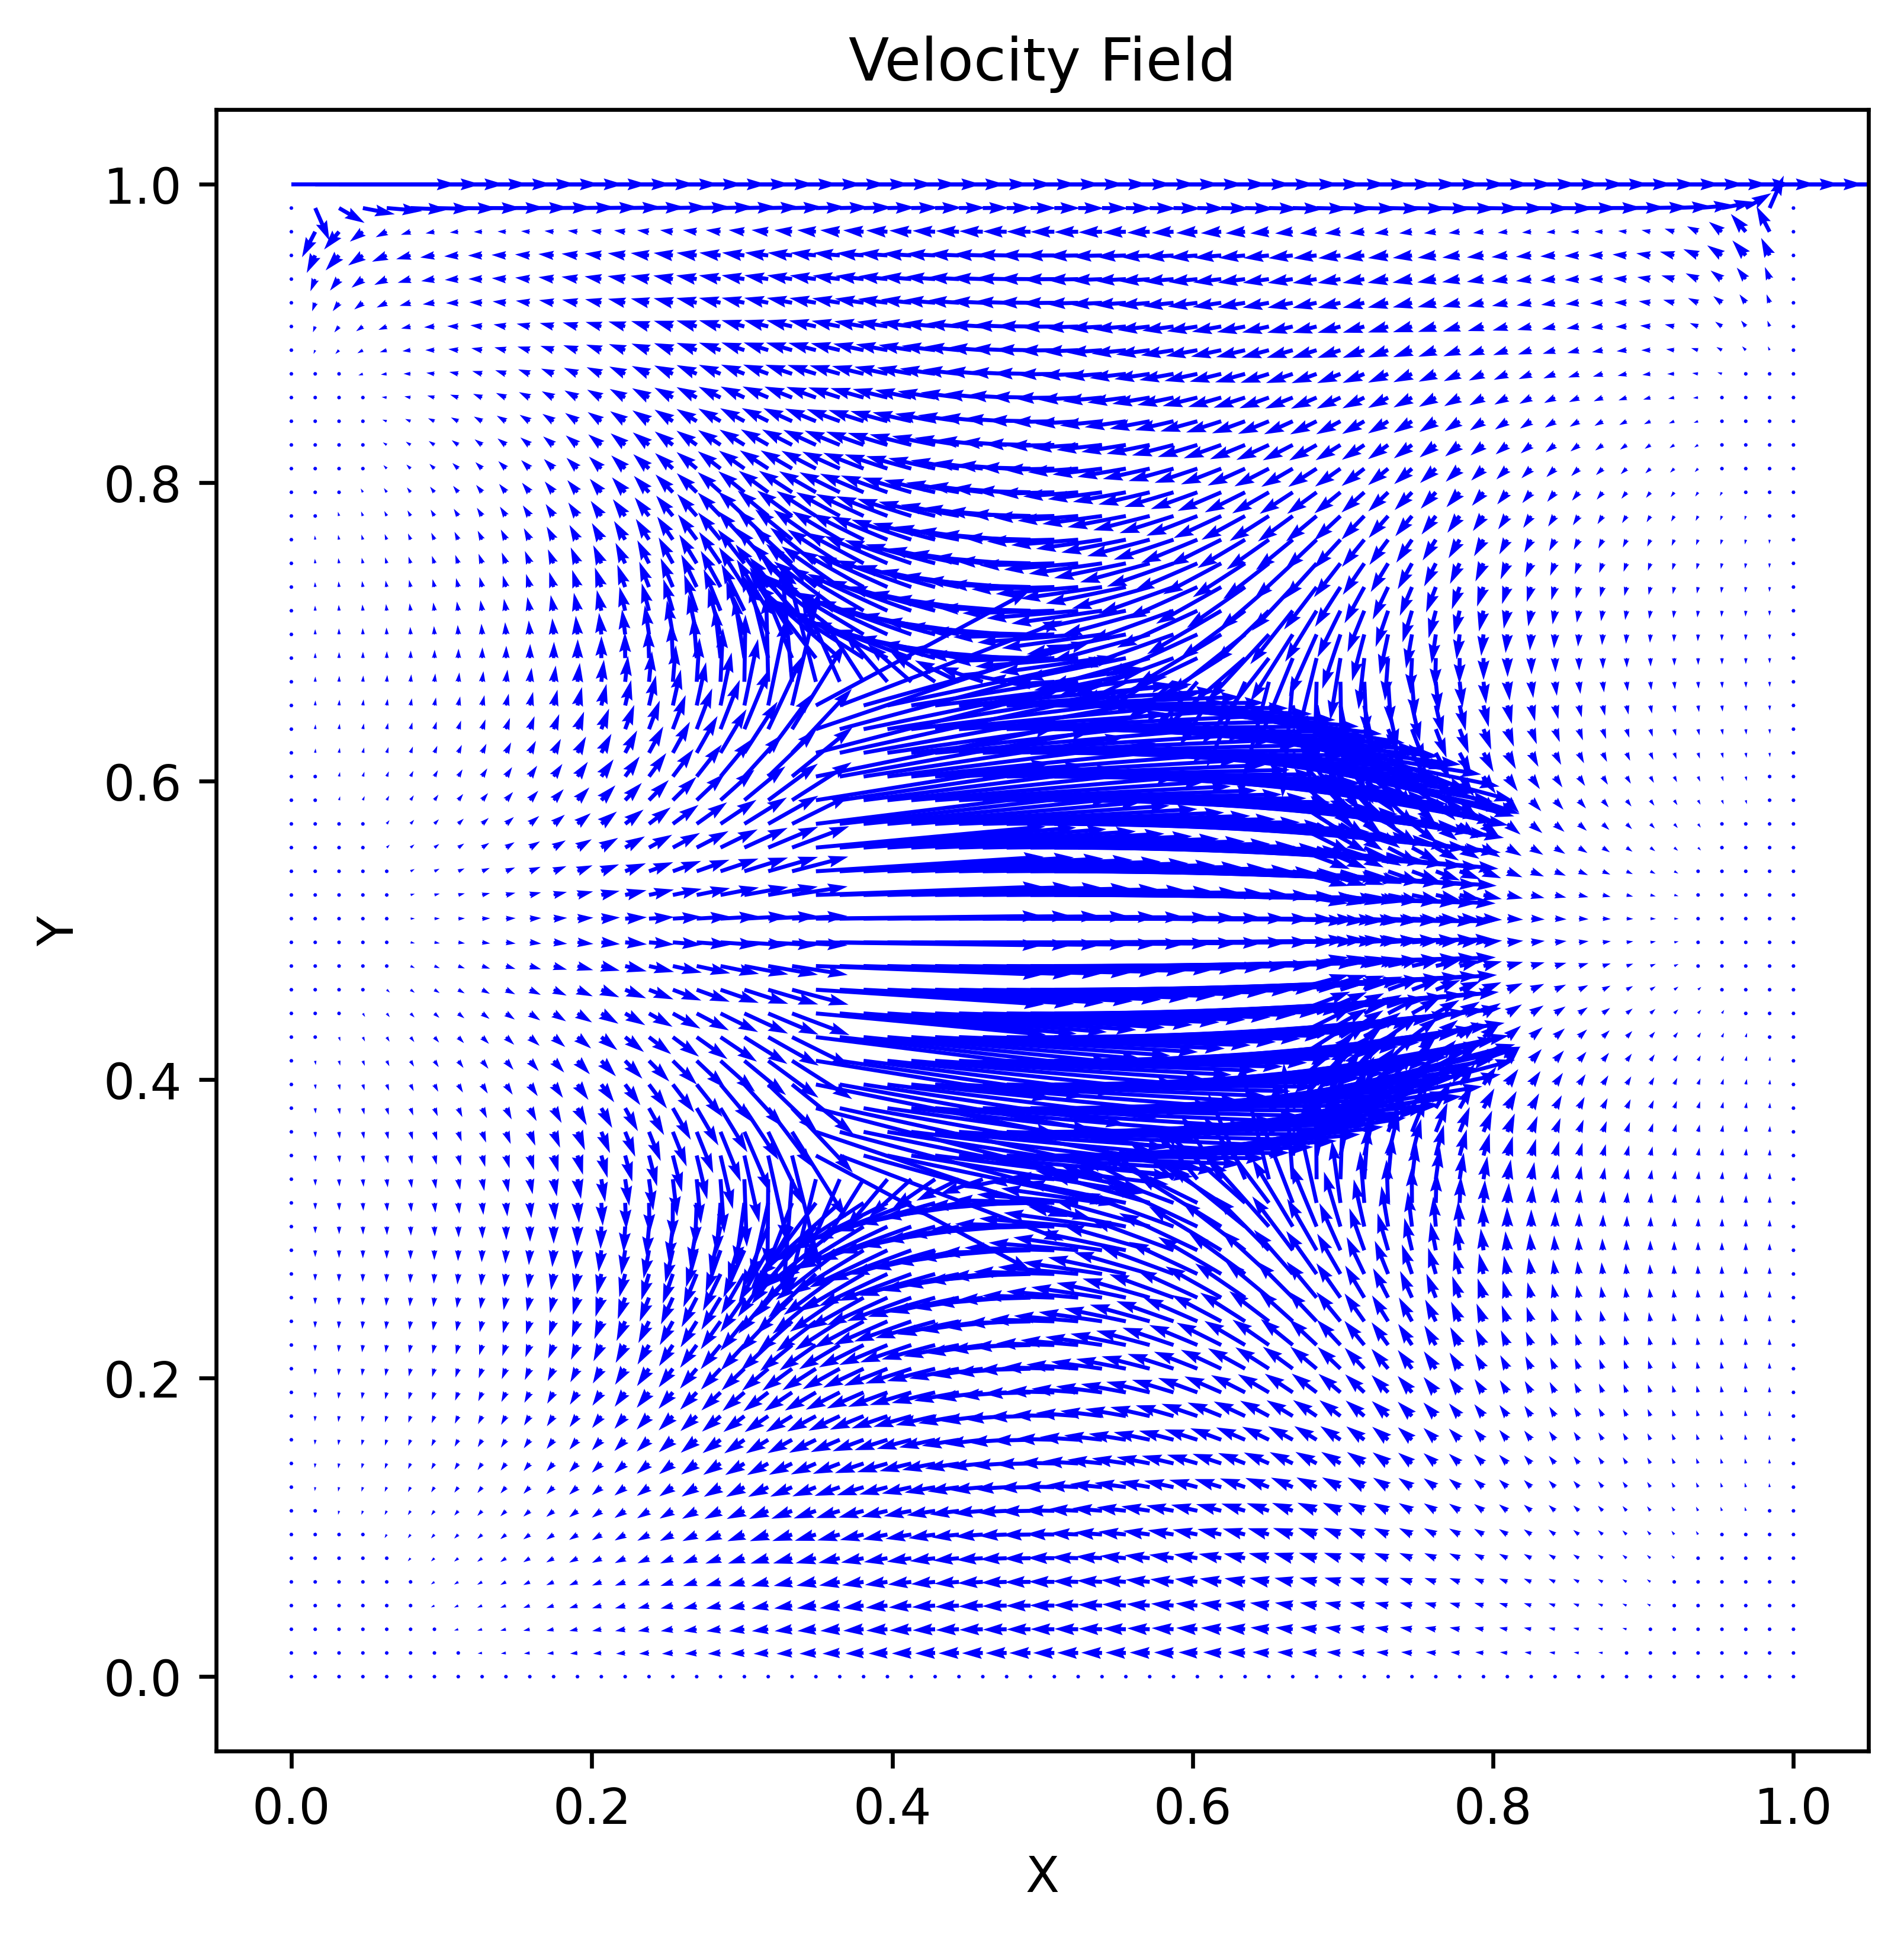

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Your simulation code here...

# Create a grid for plotting
x = np.linspace(0, L, N)
y = np.linspace(0, L, N)
X, Y = np.meshgrid(x, y)

# Plot the velocity field
plt.figure(figsize=(6, 6))
plt.quiver(X, Y, u, v, scale=10, color='b')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Velocity Field')
plt.show()


In [53]:
import numpy as np

# Parameters
L = 1.0       # Size of the square grid
N = 64        # Number of grid cells
dx = L / N    # Grid spacing
dt = 0.01     # Time step
viscosity = 0.01

# Create grids for velocity components (u, v) and pressure (p)
u = np.zeros((N, N))
v = np.zeros((N, N))
p = np.zeros((N, N))

# Create a vortex at the origin
x0, y0 = N // 2, N // 2  # Center of the vortex
radius = 10  # Vortex radius

x = np.linspace(0, L, N)
y = np.linspace(0, L, N)
print(x)
for i in range(N):
    for j in range(N):
        r = np.sqrt((x - x0) ** 2 + (y - y0) ** 2)
        if r > 0:
            u[i, j] = (y0 - y) / (2 * np.pi * r**2)
            v[i, j] = (x - x0) / (2 * np.pi * r**2)
            

X, Y = np.meshgrid(x, y)

# Plot the velocity field
plt.figure(figsize=(6, 6))
plt.quiver(X, Y, -Y/np.sqrt(X**2 + Y**2), X/np.sqrt(X**2 + Y**2), scale=50, color='b')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Velocity Field')
plt.show()



[0.         0.01587302 0.03174603 0.04761905 0.06349206 0.07936508
 0.0952381  0.11111111 0.12698413 0.14285714 0.15873016 0.17460317
 0.19047619 0.20634921 0.22222222 0.23809524 0.25396825 0.26984127
 0.28571429 0.3015873  0.31746032 0.33333333 0.34920635 0.36507937
 0.38095238 0.3968254  0.41269841 0.42857143 0.44444444 0.46031746
 0.47619048 0.49206349 0.50793651 0.52380952 0.53968254 0.55555556
 0.57142857 0.58730159 0.6031746  0.61904762 0.63492063 0.65079365
 0.66666667 0.68253968 0.6984127  0.71428571 0.73015873 0.74603175
 0.76190476 0.77777778 0.79365079 0.80952381 0.82539683 0.84126984
 0.85714286 0.87301587 0.88888889 0.9047619  0.92063492 0.93650794
 0.95238095 0.96825397 0.98412698 1.        ]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()